# MNIST Handwritten Digit Classifier - Identify Number from Cropped Image

Given a dataset of 6,000 images of handwritten digits that have beeen cropped in half in the middle, train a neural network to identify the number.

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train[:, 7:21, 7:21]
X_test = X_test[:, 7:21, 7:21]

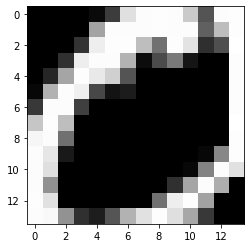

In [ ]:
plt.imshow(X_train[1], cmap='gray')

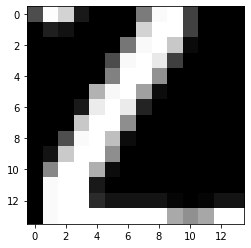

In [ ]:
plt.imshow(X_test[1], cmap='gray')

In [ ]:
image_height,image_width = 14, 14

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 196)
(10000, 196)


In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512, activation='relu', input_shape=(196,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               100864    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 368,650
Trainable params: 368,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0447 - accuracy: 0.9275 - val_loss: 0.0259 - val_accuracy: 0.9584
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0211 - accuracy: 0.9657 - val_loss: 0.0207 - val_accuracy: 0.9658
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0156 - accuracy: 0.9747 - val_loss: 0.0186 - val_accuracy: 0.9687
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0123 - accuracy: 0.9802 - val_loss: 0.0197 - val_accuracy: 0.9683
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0099 - accuracy: 0.9844 - val_loss: 0.0193 - val_accuracy: 0.9706
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0078 - accuracy: 0.9880 - val_loss: 0.0208 - val_accuracy: 0.9707
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0070 - accuracy: 0.9894 - val_loss: 0.0196 - val_ac

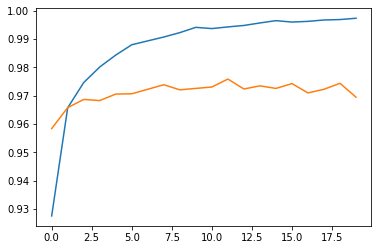

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

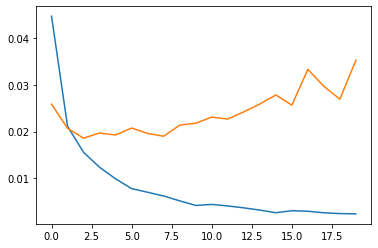

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9695


[0.035283878445625305, 0.9695000052452087]